In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#from rdkit import Chem

#from hotbit import Hotbit
import numpy as np
import os
import cclib

import matplotlib.pyplot as plt
%matplotlib inline

import subprocess
import shlex

"""from autotst.job import Job as AutoTST_Job
from autotst.species import Conformer, Species
from autotst.calculators.gaussian import Gaussian as AutoTST_Gaussian
from autotst.reaction import Reaction

from rmgpy.molecule import Molecule as RMG_Molecule
"""

def get_opt_energies(scan_log):
    """
    Sets data attributes using cclib and Arkane

    scan_log :: name of scan log
    path     :: path to scan log
    """
    parser = cclib.io.ccread(scan_log)

    opt_indices = [i for i, status in enumerate(parser.optstatus) if status==2]
    opt_SCFEnergies = [parser.scfenergies[index] for index in opt_indices]

    return [opt_SCFEnergies, parser]


73 73
73 73


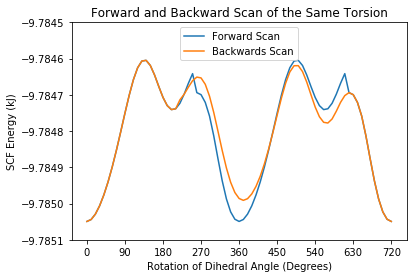

In [19]:
path = '/home/C-Underkoffler/Code/Hindered_Rotors/clean_run2/ONCC(=O)O/From_Workflow'
os.chdir(path)

log = 'LRHPLDYGYMQRHN-UHFFFAOYSA-N_GeoFreq_a2.log'
log = 'NPWGWQRXHVJJRD-UHFFFAOYSA-N_GeoFreq_a1.log'
log1 = 'NPWGWQRXHVJJRD-UHFFFAOYSA-N_72by10.0_tor03_a1.log'
log2 = 'NPWGWQRXHVJJRD-UHFFFAOYSA-N_72by-10.0_tor03_a1.log'
steps = 72
step_size = 10.0

opt_SCFenergies, parser = get_opt_energies(log1)
opt_SCFenergies = [energy/1000 for energy in opt_SCFenergies]
thetas = [i*step_size for i in range(steps+1)]
print len(thetas), len(opt_SCFenergies)

#try:
assert len(thetas) == len(opt_SCFenergies)
#plt.scatter(thetas, opt_SCFenergies)
plt.plot(thetas, opt_SCFenergies, label='Forward Scan')


step_size = -10.0
opt_SCFenergies, parser = get_opt_energies(log2)
opt_SCFenergies = [energy/1000 for energy in opt_SCFenergies]
thetas = [i*step_size for i in range(steps+1)]
min_theta = min(thetas)
thetas = [theta-min_theta for theta in thetas]
print len(thetas), len(opt_SCFenergies)

#try:
assert len(thetas) == len(opt_SCFenergies)
#plt.scatter(thetas, opt_SCFenergies)
plt.plot(thetas, opt_SCFenergies, label='Backwards Scan')

plt.legend()
plt.ylabel('SCF Energy (kJ)')
plt.xlabel('Rotation of Dihedral Angle (Degrees)')



plt.ylim(-9.7851, -9.7845)
plt.xticks(np.arange(0, 730, step=90))
#plt.title?
plt.title('Forward and Backward Scan of the Same Torsion')
plt.show()

In [3]:
os.getcwd()

'/home/C-Underkoffler/Code/Hindered_Rotors/clean_run2/ONCC(=O)O/From_Workflow'

37 37


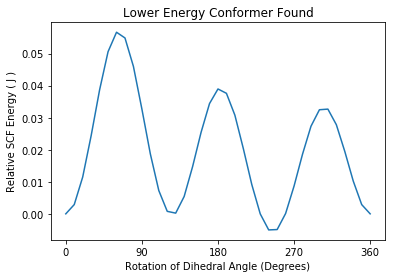

In [48]:
path = '/home/C-Underkoffler/Code/Hindered_Rotors/clean_run2/CCCCO/From_Workflow'

os.chdir(path)

log = 'LRHPLDYGYMQRHN-UHFFFAOYSA-N_GeoFreq_a2.log'
log = 'LRHPLDYGYMQRHN-UHFFFAOYSA-N_36by10.0_tor03_a1.log'
log = 'LRHPLDYGYMQRHN-UHFFFAOYSA-N_36by10.0_tor03_a1.log'
#log1 = 'NPWGWQRXHVJJRD-UHFFFAOYSA-N_72by10.0_tor03_a1.log'
#log2 = 'NPWGWQRXHVJJRD-UHFFFAOYSA-N_72by-10.0_tor03_a1.log'
steps = 36
step_size = 10.0

opt_SCFenergies, parser = get_opt_energies(log)
start_opt = opt_SCFenergies[0]
opt_SCFenergies = [energy-start_opt for energy in opt_SCFenergies]
#print opt_SCFenergies
thetas = [i*step_size for i in range(steps+1)]
print len(thetas), len(opt_SCFenergies)

#plt.scatter(thetas, opt_SCFenergies)
plt.plot(thetas, opt_SCFenergies)


plt.legend()
plt.ylabel('Relative SCF Energy ( J )')
plt.xlabel('Rotation of Dihedral Angle (Degrees)')



#plt.ylim(-9.7851, -9.7845)
plt.xticks(np.arange(0, 370, step=90))
#plt.title?
plt.title('Lower Energy Conformer Found')
plt.show()
plt.close()

37 37


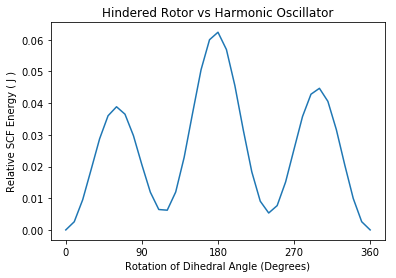

In [49]:
path = '/home/C-Underkoffler/Code/Hindered_Rotors/clean_run2/CCCCO/From_Workflow'

os.chdir(path)

log = 'LRHPLDYGYMQRHN-UHFFFAOYSA-N_GeoFreq_a2.log'
log = 'LRHPLDYGYMQRHN-UHFFFAOYSA-N_36by10.0_tor03_a1.log'
log = 'LRHPLDYGYMQRHN-UHFFFAOYSA-N_36by10.0_tor03_a2.log'
#log1 = 'NPWGWQRXHVJJRD-UHFFFAOYSA-N_72by10.0_tor03_a1.log'
#log2 = 'NPWGWQRXHVJJRD-UHFFFAOYSA-N_72by-10.0_tor03_a1.log'
steps = 36
step_size = 10.0

opt_SCFenergies, parser = get_opt_energies(log)
start_opt = opt_SCFenergies[0]
opt_SCFenergies = [energy-start_opt for energy in opt_SCFenergies]
#print opt_SCFenergies
thetas = [i*step_size for i in range(steps+1)]
print len(thetas), len(opt_SCFenergies)

#plt.scatter(thetas, opt_SCFenergies)
plt.plot(thetas, opt_SCFenergies)


plt.legend()
plt.ylabel('Relative SCF Energy ( J )')
plt.xlabel('Rotation of Dihedral Angle (Degrees)')



#plt.ylim(-9.7851, -9.7845)
plt.xticks(np.arange(0, 370, step=90))
#plt.title?
plt.title('Hindered Rotor vs Harmonic Oscillator')
plt.show()
plt.close()